In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
num_gpus = [1, 2, 4, 6, 8, 10, 12]

SINGLE_GPU_TIMING = 23.86 # to obtain: mpirun -np 1 multi_GPU_VanillaBP

wfbp = [SINGLE_GPU_TIMING, 11.99, 11.92, 9.86, 8.85, 6.83, 6.78]
vanilla = [SINGLE_GPU_TIMING, 12.163, 12.644, 10.91, 10.53, 8.15, 8.25]
ddp = [SINGLE_GPU_TIMING, 13.47, 9.76, 7.16, 5.90, 4.77, 4.20]


speedups = [(x-y)*100/x for (x,y) in zip(vanilla, wfbp)]

Text(0, 0.5, 'Time (seconds)')

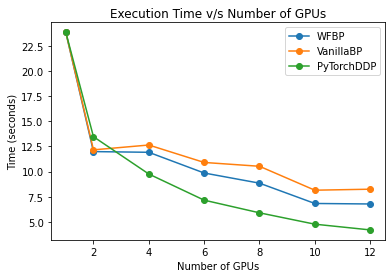

In [ ]:
plt.plot(num_gpus, wfbp, marker='o', label='WFBP')
plt.plot(num_gpus, vanilla, marker='o', label='VanillaBP')
plt.plot(num_gpus, ddp, marker='o', label='PyTorchDDP')
plt.title("Execution Time v/s Number of GPUs")
plt.legend()
plt.xlabel("Number of GPUs")
plt.ylabel("Time (seconds)")


(0.0, 22.0)

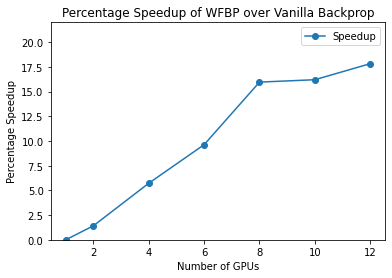

In [ ]:
plt.plot(num_gpus, speedups, marker='o', label='Speedup')
plt.title("Percentage Speedup of WFBP over Vanilla Backprop")
plt.legend()
plt.xlabel("Number of GPUs")
plt.ylabel("Percentage Speedup")
plt.ylim(0,22)

In [ ]:
# Spread out data into rows
data = []
for impl, times in [('vanilla', vanilla), ('wfbp', wfbp), ('ddp', ddp)]:
  impl_repeat = [impl for i in range(len(times))]
  data += list(zip(impl_repeat, num_gpus, times))

# Combine rows into one dataframe
df = pd.DataFrame(
  columns = ['Implementation', 'GPU Count', 'Runtime'], data = data
)

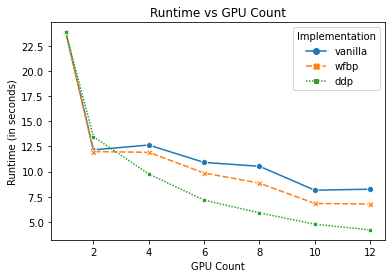

In [ ]:
sns.lineplot(
  data = df,
  x = 'GPU Count',
  y = 'Runtime',
  hue = 'Implementation',
  style = 'Implementation',
  markers = True,
)
plt.title('Runtime vs GPU Count')
plt.ylabel('Runtime (in seconds)')
plt.savefig('runtime.png')

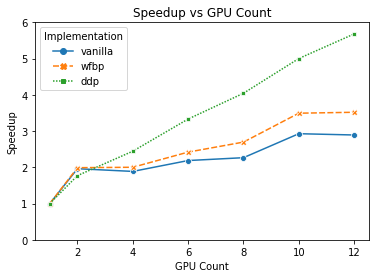

In [ ]:
# Calculate speedup based on serial run of each implementation...
for impl in df['Implementation'].unique():
  mask = df['Implementation'] == impl

  # Serial time should be the first time listed for the implementation
  serial_time = df[mask]['Runtime'].iloc[0]

  df.loc[mask, 'Speedup'] = serial_time / df[mask]['Runtime']

# ...and plot the results
sns.lineplot(
  data = df,
  x = 'GPU Count',
  y = 'Speedup',
  hue = 'Implementation',
  style = 'Implementation',
  markers = True,
)

plt.ylim(0,6)
plt.title('Speedup vs GPU Count')
plt.ylabel('Speedup')
plt.savefig('speedup.png')

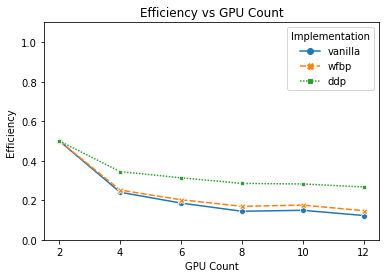

In [15]:
# Calculate efficiency based on serial run of each implementation...
for impl in df['Implementation'].unique():
  mask = df['Implementation'] == impl

  # Serial time should be the first time listed for the implementation
  serial_time = df[mask]['Runtime'].iloc[0]

  df.loc[mask, 'Efficiency'] = serial_time \
    / (df[mask]['Runtime']*df[mask]['GPU Count'])

# ...and plot the results
sns.lineplot(
  data = df,
  x = 'GPU Count',
  y = 'Efficiency',
  hue = 'Implementation',
  style = 'Implementation',
  markers = True,
)
plt.ylim(0,1.1)
plt.title('Efficiency vs GPU Count')
plt.ylabel('Efficiency ')
plt.savefig('efficiency.png')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


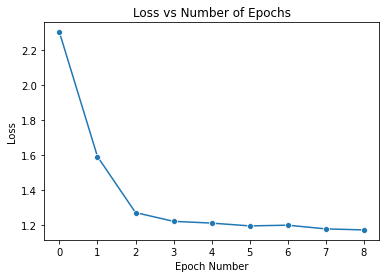

In [ ]:
# Sanity checks using MNIST for single GPU 
loss = [2.3, 1.59, 1.27, 1.22, 1.21, 1.194, 1.198, 1.177, 1.171]
epochs = list(range(len(loss)))
sns.lineplot(epochs, loss, marker='o')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title("Loss vs Number of Epochs")
plt.savefig('mnist-single_gpu.png')

In [ ]:
!ls

efficiency.png	mnist-single_gpu.png  runtime.png  sample_data	speedup.png


In [16]:
# Download all the plots, since just copying them over to a doc was
# being weird
from google.colab import files
for img in ['runtime.png', 'speedup.png', 'efficiency.png','mnist-single_gpu.png']:
  files.download(img)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>